## Stage One: Importing the CSV

I went with the "Twitch Games" CSV from Kaggle, which detailed a variety of information based on different factors that can be drawn from Twitch streaming (average viewers, for instance). One major issue that this dataset had that I didn't notice until the Groupby portion was that the author of this CSV, despite it being almost entirely positive reviews, had some atrocious data formatting and all of the headers were listed separately, leading to some difficultly in parsing the data per the requirements.

In [1]:
import pandas as pd
import os
twitch = pd.read_csv('twitchgames.csv')

print(twitch)

       Rank                              Game  Month  Year  Hours_watched  \
0         1                 League of Legends      1  2016       94377226   
1         2  Counter-Strike: Global Offensive      1  2016       47832863   
2         3                            Dota 2      1  2016       45185893   
3         4                       Hearthstone      1  2016       39936159   
4         5       Call of Duty: Black Ops III      1  2016       16153057   
...     ...                               ...    ...   ...            ...   
13795   196                            DEVOUR      9  2021         723182   
13796   197                       War Thunder      9  2021         723003   
13797   198                    Lost in Random      9  2021         720893   
13798   199                       Garry's Mod      9  2021         712712   
13799   200                      Potion Craft      9  2021         704446   

      Hours_Streamed  Peak_viewers  Peak_channels  Streamers  Avg_viewers  

## Stage Two: Heading Differences in datatypes

In [2]:
print(twitch.dtypes)

Rank                  int64
Game                 object
Month                 int64
Year                  int64
Hours_watched         int64
Hours_Streamed       object
Peak_viewers          int64
Peak_channels         int64
Streamers             int64
Avg_viewers           int64
Avg_channels          int64
Avg_viewer_ratio    float64
dtype: object


In [3]:
print(twitch['Game'].head())
print(twitch['Avg_viewers'].head())

0                   League of Legends
1    Counter-Strike: Global Offensive
2                              Dota 2
3                         Hearthstone
4         Call of Duty: Black Ops III
Name: Game, dtype: object
0    127021
1     64378
2     60815
3     53749
4     21740
Name: Avg_viewers, dtype: int64


## Stage Three: Groupby Exploration (with math!)

In [4]:
hours = twitch.groupby('Hours_watched')
print(hours.mean())

                Rank  Month    Year  Peak_viewers  Peak_channels  Streamers  \
Hours_watched                                                                 
89811          200.0    5.0  2016.0         643.0           51.0      630.0   
92460          200.0    6.0  2016.0       20986.0            9.0       79.0   
92951          199.0    6.0  2016.0        6367.0            6.0      105.0   
93135          200.0    9.0  2016.0        5184.0           12.0      424.0   
93519          199.0    5.0  2016.0         750.0           13.0      250.0   
...              ...    ...     ...           ...            ...        ...   
253419456        2.0    5.0  2021.0     1140656.0         6978.0   197818.0   
270395369        1.0    3.0  2021.0     1086313.0         8309.0   469545.0   
285948196        1.0    5.0  2021.0      983678.0         7465.0   462447.0   
289547911        1.0    4.0  2021.0      937749.0         8026.0   474257.0   
344551979        1.0    4.0  2020.0     1728977.0   

In [5]:
streamers = twitch.groupby('Streamers')
print(streamers.median())

            Rank  Month    Year  Hours_watched  Peak_viewers  Peak_channels  \
Streamers                                                                     
0           91.0    7.0  2016.0       378280.0       11722.0          164.0   
2          142.5    9.0  2018.0       537361.5       33876.0           11.0   
3          195.0   12.0  2016.0       140684.0        7317.0          181.0   
4          148.5    9.5  2017.5       336124.0       27036.0           89.0   
5          162.0   11.5  2018.0       438690.0       11481.0            4.5   
...          ...    ...     ...            ...           ...            ...   
930299       1.0    5.0  2018.0    144602326.0      576926.0        18000.0   
945248       1.0    7.0  2018.0    152086231.0      827125.0        19495.0   
974227       1.0    8.0  2018.0    131436549.0      687062.0        17450.0   
1013016      1.0    1.0  2019.0    126502656.0      649136.0        56274.0   
1013029      1.0   12.0  2018.0    118143183.0      

In [20]:
comparison = twitch.groupby(['Peak_viewers', 'Rank'])['Streamers'].mean()
comparison.head()

Peak_viewers  Rank
441           146       96.0
466           195     4683.0
483           162      824.0
547           156       51.0
590           125       44.0
Name: Streamers, dtype: float64

## Stage Four: Plotting Data

Biggest problem with this section was trying to limit the amount of data plotted!

Rank
1      AxesSubplot(0.125,0.125;0.775x0.755)
2      AxesSubplot(0.125,0.125;0.775x0.755)
3      AxesSubplot(0.125,0.125;0.775x0.755)
4      AxesSubplot(0.125,0.125;0.775x0.755)
5      AxesSubplot(0.125,0.125;0.775x0.755)
                       ...                 
196    AxesSubplot(0.125,0.125;0.775x0.755)
197    AxesSubplot(0.125,0.125;0.775x0.755)
198    AxesSubplot(0.125,0.125;0.775x0.755)
199    AxesSubplot(0.125,0.125;0.775x0.755)
200    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Streamers, Length: 200, dtype: object

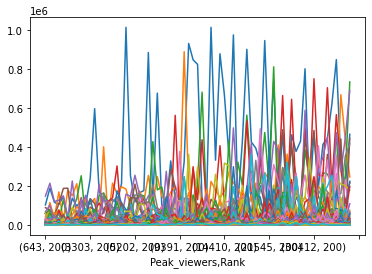

In [21]:
comparison.groupby(['Rank']).plot(legend=False)